## Python data analysis of straming services data.

#### Imports

In [1]:
#import sys
#pip install wordcloud
#pip install kaggle
#pip install geopandas
#pip install folium

In [2]:
#pip uninstall matplotlib

In [3]:
#conda install matplotlib=2.1.1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import io
import os

In [5]:
#pip install --upgrade Pillow

Important note about kaggle API:  
    Before running the import statement, make sure you have .kaggle file downloaded from kaggle.com

In [6]:
from kaggle.api.kaggle_api_extended import KaggleApi

#### Datasets    
Datasets for a variety of streaming services: 
1) Netflix  
2) Disney+  
3) Amazon Prime  
4) Hulu  
  
Source: Kaggle.com

In [7]:
api = KaggleApi()
api.authenticate()

data_path = os.path.join(os.getcwd(), 'data')

data_dict = {
    'netflix': 'shivamb/netflix-shows',
    'disney': 'shivamb/disney-movies-and-tv-shows',
    'amazon': 'shivamb/amazon-prime-movies-and-tv-shows',
    'hulu': 'shivamb/hulu-movies-and-tv-shows'
}



##### Downloading data using Kaagle API

In [8]:
for i in data_dict.values():
    print(f'Now downloading data for {i}')
    api.dataset_download_files(i, path=data_path, unzip=True)

Now downloading data for shivamb/netflix-shows
Now downloading data for shivamb/disney-movies-and-tv-shows
Now downloading data for shivamb/amazon-prime-movies-and-tv-shows
Now downloading data for shivamb/hulu-movies-and-tv-shows


##### Creating DataFrames

In [9]:
files = os.listdir(data_path)
for file in files:
    print(file)


amazon_prime_titles.csv
disney_plus_titles.csv
hulu_titles.csv
netflix_titles.csv


Now i want to dynamically create dataframe names, but it is challanging in python since variable names are determined at code-writing time, and they are static. The way around this issue is to determine if statements to check file name and then assign right df name.

In [10]:
for file in files:
    if file == 'amazon_prime_titles.csv':
        amazon_df = pd.read_csv(os.path.join(data_path, file))
    elif file == 'disney_plus_titles.csv':
        disney_df = pd.read_csv(os.path.join(data_path, file))
    elif file == 'hulu_titles.csv':
        hulu_df = pd.read_csv(os.path.join(data_path, file))
    elif file == 'netflix_titles.csv':
        netflix_df = pd.read_csv(os.path.join(data_path, file))
    else:
        pass

Now dataframes should have been created, let's review.

In [11]:
amazon_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...


In [12]:
disney_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [13]:
hulu_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."


In [14]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Okay all df are ready, but we can still make them a little bit better by making few adjustments.

##### Data modification

First off, let's make a list of dataframes that we have, so we can later on modify all of them at once and reduce the amount of code we need to duplucate.

In [15]:
dataframes = [amazon_df, disney_df, hulu_df, netflix_df]

Now let's think about things to modify in all dataframes. I'd like to:    
- rename 'listed_in' column to 'genre'  
- check for duplicates and remove them  

In [16]:
for df in dataframes:
    df.drop('show_id',axis=1)
    df.rename(columns={'listed_in':'genre'}, inplace=True)
    print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 0
Number of duplicates: 0
Number of duplicates: 0
Number of duplicates: 0


In [17]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Okay so we do not have any duplicates and other issues are fixed now.  
Before we continue with an analysis, let's review the structure of the data itself.  

In [18]:
amazon_df.shape

(9668, 12)

In [19]:
disney_df.shape

(1450, 12)

In [20]:
hulu_df.shape

(3073, 12)

In [21]:
netflix_df.shape

(8807, 12)

Okay so amazon seems to have the most records, followed by netflix, and disney.  
Let's make a combined df to analyze the data from all services to have the widest range of data.

In [22]:
combined_df = pd.concat(dataframes, axis=0)

In [23]:
combined_df['rating'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE', 'TV-Y7-FV', 'NOT RATED', '2 Seasons', '93 min',
       '4 Seasons', '136 min', '91 min', '85 min', '98 min', '89 min',
       '94 min', '86 min', '3 Seasons', '121 min', '88 min', '101 min',
       '1 Season', '83 min', '100 min', '95 min', '92 min', '96 min',
       '109 min', '99 min', '75 min', '87 min', '67 min', '104 min',
       '107 min', '84 min', '103 min', '105 min', '119 min', '114 min',
       '82 min', '90 min', '130 min', '110 min', '80 min', '6 Seasons',
       '97 min', '111 min', '81 min', '49 min', '45 min', '41 min',
       '73 min', '40 min', '36 min', '39 min', '34 min', '47 min',
       '65 min', '37 min', '78 min', '102 min', '129 min', '115 min',
       '112 min', '61 min', '106 min', '76 min', '77 min', '79 min',
       '157 min', '

As we can see, we found another issue with the data. In some of the source files, some fows have wrong values in 'rating' column. These are the values that represent 'duration', so we have to move it to the right column and remove from the 'rating' column.

In [24]:
dataframes.append(combined_df) #append so further loops also includes combined dataframe

In [25]:
for df in dataframes:
    #setting a condition:
    condition = (df['rating'].str.contains('min')) | (df['rating'].str.contains('Season'))
    #moving values to the.str.contains('min') 'duration' column
    df.loc[condition, 'duration'] = df.loc[condition, 'rating']
    #removing wrong values from 'rating' column
    df.loc[condition, 'rating'] = pd.NA

In [26]:
combined_df['rating'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE', 'TV-Y7-FV', 'NOT RATED', <NA>, 'UR'], dtype=object)

Okay, now it works fine! We can move on.

In [27]:
combined_df['genre'].unique()

array(['Comedy, Drama', 'Drama, International', 'Action, Drama, Suspense',
       ..., 'Action & Adventure, Documentaries, Sports Movies',
       'International Movies, LGBTQ Movies, Romantic Movies',
       'Cult Movies, Dramas, Thrillers'], dtype=object)

In [28]:
combined_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [29]:
combined_df['release_year'].min() , combined_df['release_year'].max() 

(1920, 2021)

Okay so we can see that there are only two show types:  
    **Movie** and **TV Show**. This column has to be taken into account as these types of productions dirrer in many ways.
There is also a rating column with a standard tv rating guide.  
There is a genre column, yet it has a lot of different genres, very specific.  
We have a release_year column spreading from as early as 1920, up intill 2021 when the dataset was published.  
And of course there are few other column such as title, description, cast, country, duration etc.

In [30]:
combined_df[combined_df['type'] == 'Movie']['duration'].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '104 min', '62 min', '50 min',
       '86 min', '36 min', '37 min', '103 min', '9 min', '18 min',
       '14 min', '20 min', '19 min', '22 min', '60 min', '6 min',
       '54 min', '5 min', '84 min', '126 min', '125 min', '109 min',
       '89 min', '85 min', '56 min', '40 min', '111 min', '33 min',
       '34 min', '95 min', '99 min', '78 min', '77 min', '55 min',
       '53 min', '115 min', '58 min', '49 min', '135 min', '91 min',
       '64 min', '59 min', '48 min', '122 min', '90 min', '102 min',
       '65 min', '114 min', '136 min', '70 min', '138 min', '100 min',
       '480 min', '4 min', '30 min', '152 min', '68 min', '57 min',
       '31 min', '151 min', '149 min', '141 min', '121 min', '79 min',
       '140 min', '51 min', '106 min', '75 min', '27 min', '107 min',
       '108 min', '38 min', '157 min', '

In [31]:
combined_df[(combined_df['type'] == 'Movie') & (combined_df['duration'].str.contains('Season'))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
50,s51,Movie,Yashahime: Princess Half-Demon,NaN,NaN,Japan,"October 9, 2021",2020,<NA>,2 Seasons,Anime,Long-lost twins Towa and Setsuna reunite after...
263,s264,Movie,Trolls: TrollsTopia,NaN,NaN,United States,"September 2, 2021",2020,<NA>,4 Seasons,"Family, Kids",Trolls: TrollsTopia! is the next chapter in th...
471,s472,Movie,This Way Up,NaN,NaN,United Kingdom,"July 9, 2021",2019,<NA>,2 Seasons,"Comedy, Drama, International","This Way Up is a comedy drama about moving on,..."
801,s802,Movie,Everything's Gonna Be Okay,NaN,NaN,United States,"April 9, 2021",2020,<NA>,2 Seasons,"Comedy, Drama",Australian twenty-something Nicholas is left t...
847,s848,Movie,Juda,NaN,NaN,Israel,"March 30, 2021",2017,<NA>,2 Seasons,"Action, Adventure, Crime",Juda is a low-life gambler hustling a living i...
...,...,...,...,...,...,...,...,...,...,...,...,...
2908,s2909,Movie,The Wrong Mans,NaN,NaN,United Kingdom,"December 24, 2014",2013,<NA>,2 Seasons,"Action, Adventure, Comedy",Lowly office workers Sam (Matthew Baynton) and...
2926,s2927,Movie,The Hotwives of Orlando,NaN,NaN,United States,"July 15, 2014",2014,<NA>,1 Season,"Comedy, Sitcom",The reality genre parody examines the glamorou...
2951,s2952,Movie,All Saints (1998),NaN,NaN,Australia,"February 19, 2014",1998,<NA>,12 Seasons,"Drama, International",All Saints is an Australian medical drama focu...
2955,s2956,Movie,Getting On,NaN,NaN,United Kingdom,"January 7, 2014",2009,<NA>,3 Seasons,"Comedy, International, Sitcom",Care for the elderly is the least glamorous ar...


Seems like another problem, which is that there are in fact seasons instead of durations for movies.  
I've checked out these productions and it seems like they should have been classified as Tv series, yet I can see much more missing data, and it's only 62 of them so let's delete these records altogether as they seem to be incorect and not reliable.

In [32]:
for df in dataframes:
    delete_condition = (df['type'] == 'Movie') & (df['duration'].str.contains('Season'))
    df.drop(df[delete_condition].index, inplace=True)

Okay now let's create another column 'duration_min' in type numeric so we can make some better analysis.

In [33]:
for df in dataframes:
    df['duration_min'] = df['duration'].str.split(' ').str[0]
    df['duration_min'] = pd.to_numeric(df['duration_min'], errors='coerce')

In [34]:
combined_df[combined_df['type'] == 'Movie']['duration_min'].min(), combined_df[combined_df['type'] == 'Movie']['duration_min'].max()

(0.0, 601.0)

In [35]:
amazon_df[amazon_df['type'] == 'TV Show']['duration'].unique()

array(['1 Season', '3 Seasons', '2 Seasons', '4 Seasons', '7 Seasons',
       '9 Seasons', '6 Seasons', '5 Seasons', '29 Seasons', '19 Seasons',
       '21 Seasons', '8 Seasons', '12 Seasons', '11 Seasons',
       '10 Seasons', '14 Seasons', '15 Seasons'], dtype=object)

Okay so we can see that when it comes to **Movies**, the length varies between 0 and 601 minutes, while for **Tv Shows**, the length varies between 1 and 15 seasons.

In [36]:
combined_df.shape

(22785, 13)

### Data Analysis

Let's move on to the data analysis part using numpy, matplotlib and seaborn.

##### Pie plot for combined data - amount of tv shows vs movies

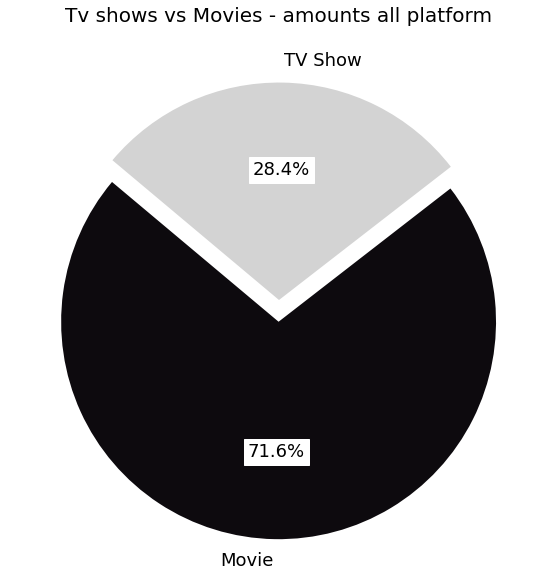

In [37]:
type_counts = combined_df['type'].value_counts()

explode = (0.1, 0)
colors = ['#0d0a0e', '#d3d3d3']
plt.figure(figsize=(10, 10))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors,
       textprops={'fontsize': 18, 'color': 'black', 'weight': 'bold', 'backgroundcolor': 'white'})
plt.title('Tv shows vs Movies - amounts all platform', fontsize=20, weight='bold')

plt.show()

We can clearly see that we have more movies. Let's see how does it look like for each streaming service serarated.

##### Pie plot for data of each platform - amount of tv shows vs movies

In [38]:
# Colors for further graphs
colors_amazon = ['#fe9802', '#000000']  # Colors Amazon
colors_disney = ['#0e4fc3', '#030d42']  # Colors Disney
colors_hulu = ['#1de783', '#122833']  # Colors for Hulu
colors_netflix = ['#e30917', '#000000']  # Colors for Netflix

# DataFrames' labels
labels = ['Amazon', 'Disney', 'Hulu', 'Netflix']

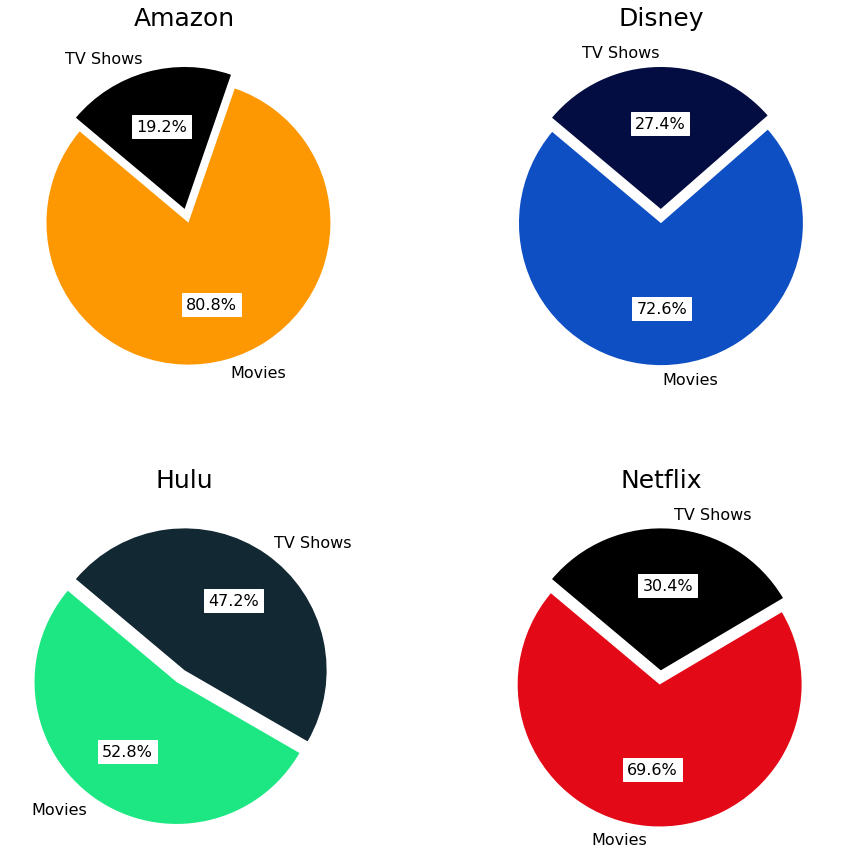

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Iterate through each DataFrame and plot the pie chart
for i, (type_counts, label, colors) in enumerate(zip([amazon_df['type'].value_counts()
                                              , disney_df['type'].value_counts()
                                              , hulu_df['type'].value_counts()
                                              , netflix_df['type'].value_counts()], labels
                                            ,[colors_amazon, colors_disney, colors_hulu, colors_netflix])):
    row = i // 2
    col = i % 2

    # Create the pie plot
    axs[row, col].pie(type_counts, labels=['Movies', 'TV Shows'], autopct='%1.1f%%', startangle=140, explode=explode
                      , colors=colors,
                     textprops={'fontsize': 16, 'color': 'black', 'weight': 'bold', 'backgroundcolor': 'white'})
    
    # Set the title for each subplot
    axs[row, col].set_title(label, fontsize=25, weight='bold')

plt.tight_layout()

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


As we can see, we can say Hulu focuses more on TV Shows compared to Movies. At the other hand, Amazon's high number of positions comes mostly from movies.

In [40]:
countries_count = combined_df['country'].value_counts()
countries_df = countries_count.to_frame()
countries_df = pd.DataFrame({'Country': countries_count.index, 'Count': countries_count.values})
countries_df.head()
countries_df = countries_df[~countries_df['Country'].str.contains(',')]

##### Movies produced in each country.

In [41]:
import plotly.express as px

In [42]:
color_discrete_map = {0: 'red', 10: 'blue', 50: 'green', 100: 'orange', 200: 'purple'}
fig = px.choropleth(countries_df, 
                   locations='Country', 
                   color='Count', 
                   hover_name='Country',
                   locationmode='country names',
                   projection='orthographic',
                   color_continuous_scale='Viridis',
                   title='How many movies each country produced?',
                  range_color=[1, 400])                
fig.show()

In [43]:
countries2_df = countries_df.head(10)
countries2_df.head()

,Country,Count
0,United States,4942
1,India,1194
2,United Kingdom,568
3,Japan,494
4,Canada,233


As we can see, the most movies available on our platforms were produced in USA, followed by India, UK and Japan.

##### The most common words that were used in movie/tv show titles.

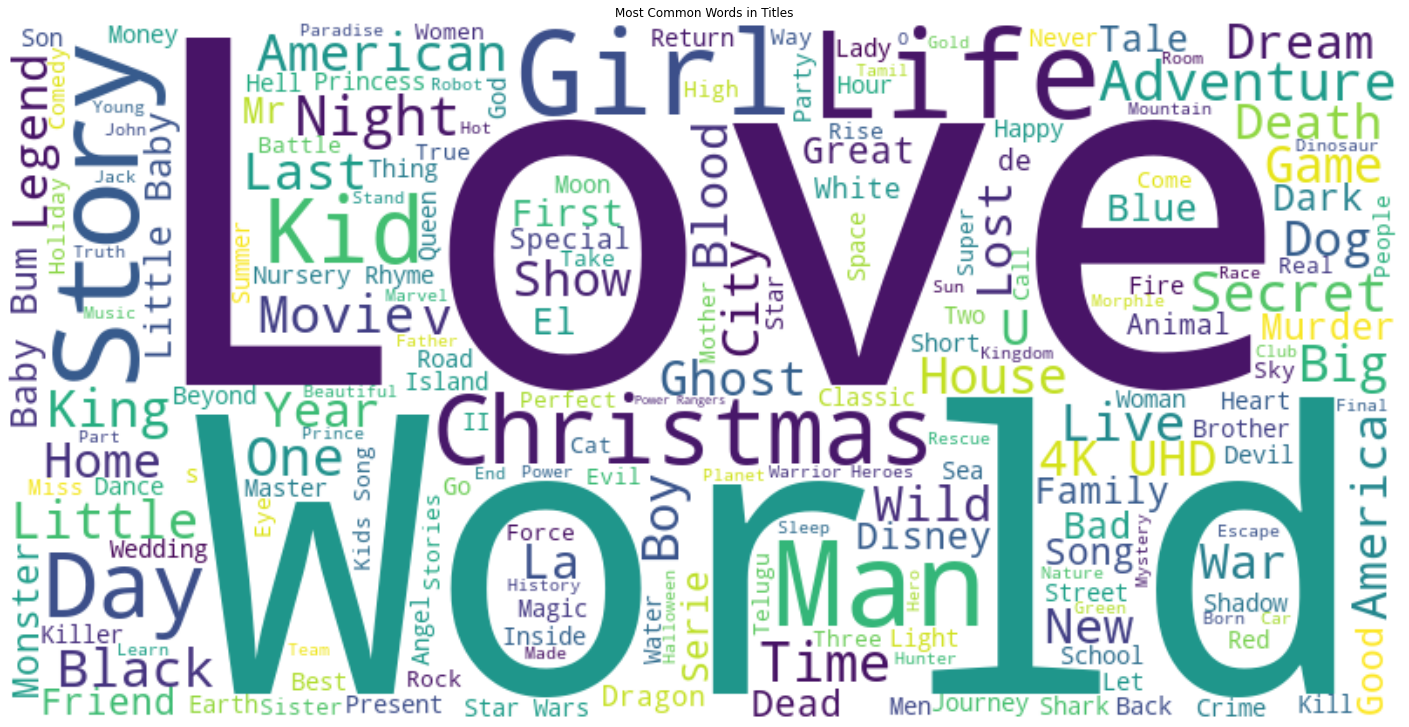

In [44]:
all_words = ' '.join(combined_df['title'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(25, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles')
plt.show()

Words like **Love**, **World**, **Life** and **Man** are among the most common used ones. Nice to know!

We can also try to find out the most busy actors, meaning you can find the most movies or/and tv shows where they starred. 

This is a bit more complicated task to do since we will not use ready made wordcloud and will build up the solution end-to-end.  
First off, the idea is to combine contents from all rows of 'cast' column into one and then cound the occurences separated by commas.  
Before that tho, we need to add an additional comma at the end of each row, so the last cast member from one row won't be combined with the first cast member of following row.  
And of course we need to then review and delete Nan values.

In [45]:
from collections import Counter

In [46]:
# Step 1: adding comma to the end of each line
combined_df['cast'] = df['cast'].astype(str) + ','

In [47]:
# Step 2: creating a loooong string to store all cast members from all productions
all_text = ''.join(combined_df['cast'])

In [48]:
# Step 3: Split the string by ','
substrings = all_text.split(',')

In [49]:
# Step 4: Count the occurrences of each substring
substring_counts = Counter(substrings)

In [50]:
# Step 5: Convert the substring_counts dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(substring_counts, orient='index', columns=['Count'])
counts_df.reset_index(inplace=True)
counts_df.rename(columns={'index': 'Substring'}, inplace=True)
counts_df = counts_df[counts_df['Substring'] != '']
counts_df = counts_df[counts_df['Substring'] != '1']
counts_df = counts_df[counts_df['Substring'] != 'nan']
counts_df.rename(columns={'Substring': 'Actor'}, inplace=True)
counts_df.sort_values(by='Count', ascending=False)

,Actor,Count
6004,Maggie Binkley,56
11682,Anupam Kher,55
3313,Nassar,43
17905,Shah Rukh Khan,35
1250,Paresh Rawal,35
...,...,...
27173,Rex Ingram,1
27174,James Edwards,1
27175,Isabel Cooley,1
27176,George McGill,1


Okay, now it looks good, seems like first 4 places took Indian actors, followed by Jim Cummings, who starred in many animations like Shrek!

In [51]:
filtered_df = counts_df[counts_df['Count'] > 5]
sorted_filtered_df = filtered_df.sort_values(by='Count', ascending=False)
sorted_filtered_df.head(50)

,Actor,Count
6004,Maggie Binkley,56
11682,Anupam Kher,55
3313,Nassar,43
1250,Paresh Rawal,35
17905,Shah Rukh Khan,35
9410,Jim Cummings,34
4432,Gene Autry,32
5385,Prakash Raj,32
1404,Om Puri,32
36688,Rupa Bhimani,31


To be quite honest, looking from the top, the first actor i know is Danny Trejo with score of **30** movies/tv shows.  
Lower down there are of course legends like Samuel L. Jackson (**26**) and Nicolas Cage (**25**).

##### The most 'popular' actors.

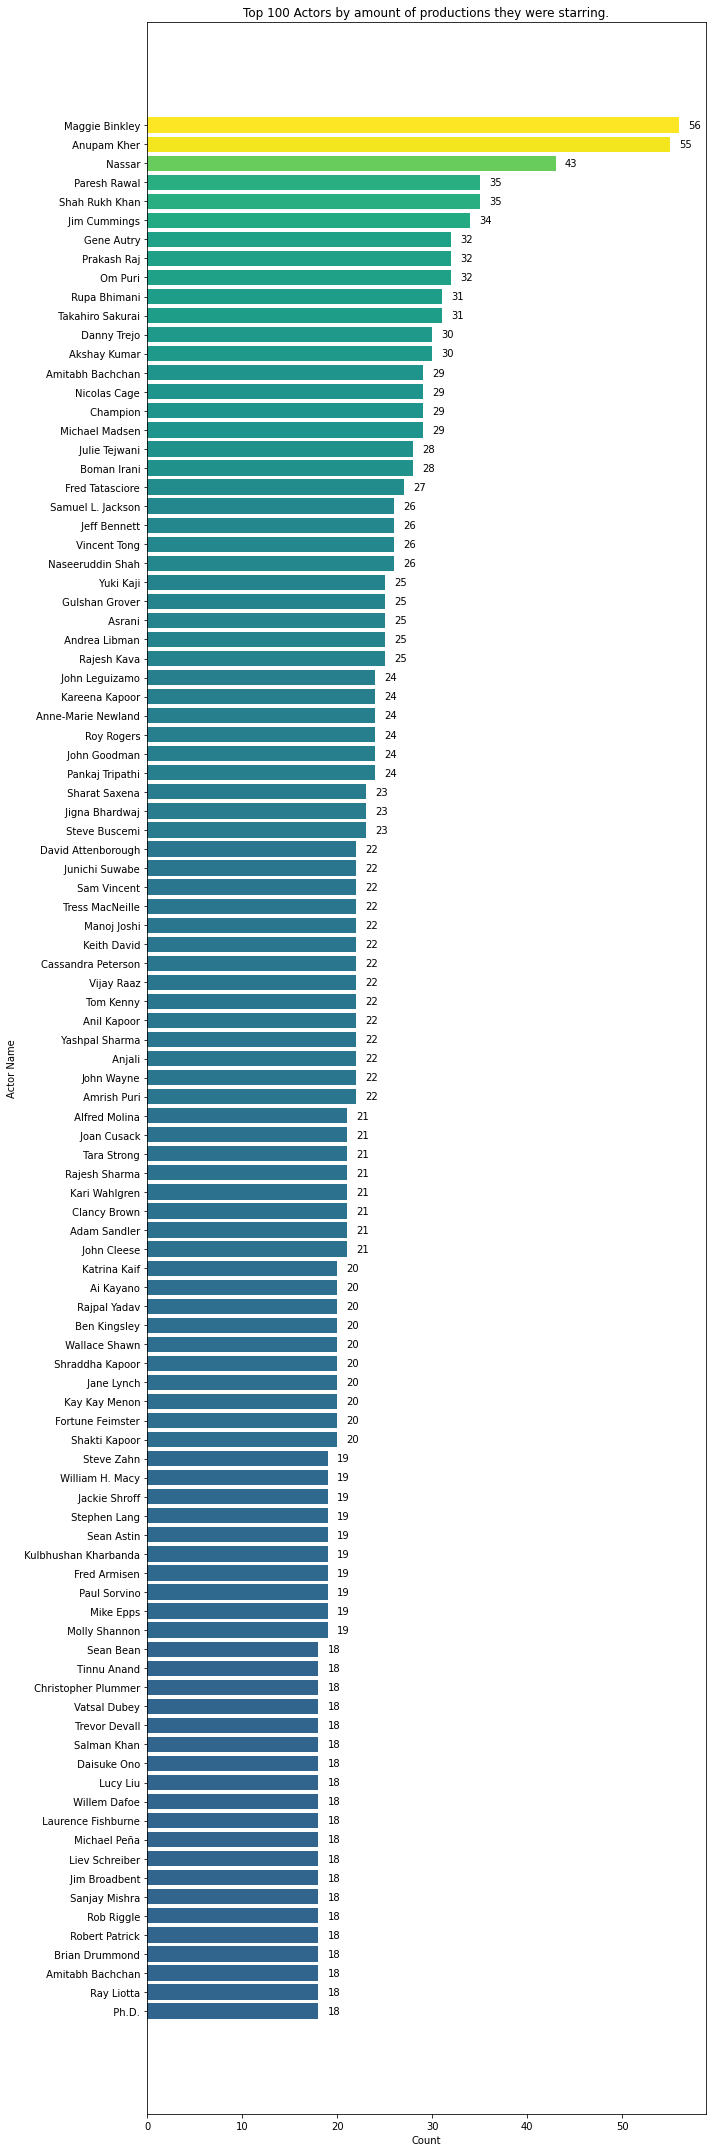

In [52]:
top_100_df = sorted_filtered_df.sort_values(by='Count', ascending=False).head(100)

# Creating a color scale
colors = plt.cm.viridis(top_100_df['Count'] / top_100_df['Count'].max())

plt.figure(figsize=(10, 30))
bars = plt.barh(top_100_df['Actor'], top_100_df['Count'], color=colors)
plt.xlabel('Count') 
plt.ylabel('Actor Name') 
plt.title('Top 100 Actors by amount of productions they were starring.')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center')

plt.tight_layout()
plt.show()


##### Movies procuced per year.

In [53]:
yearly_count = combined_df.groupby('release_year').size().reset_index(name='Count')

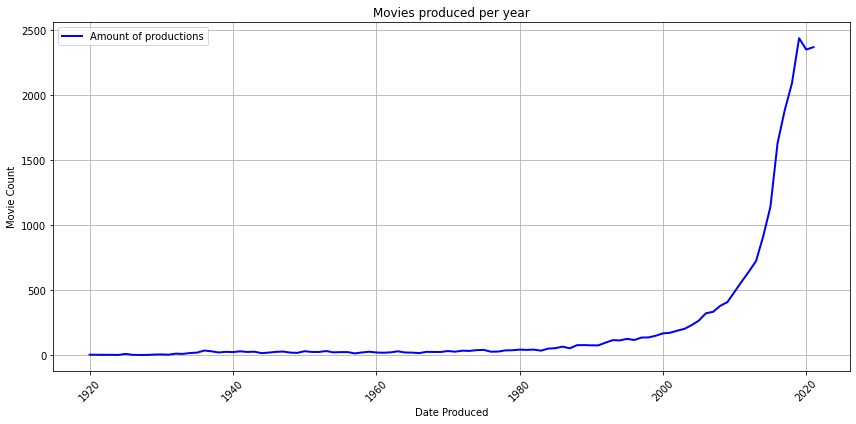

In [54]:
plt.figure(figsize=(12, 6))

plt.plot(yearly_count['release_year'], yearly_count['Count'], label='Amount of productions', color='blue', linestyle='-', linewidth=2)

plt.xlabel('Date Produced')
plt.ylabel('Movie Count')
plt.title('Movies produced per year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [55]:
#combined_df['date_added'] = pd.to_datetime(combined_df['date_added'].str.strip(), format='%B %d, %Y')
combined_df = combined_df.sort_values(by='date_added')
#combined_df.head()
date_counts = combined_df.groupby('date_added').size().reset_index(name='count')
date_counts['cumulative_count'] = date_counts['count'].cumsum()
date_counts

,date_added,count,cumulative_count
0,"April 15, 2018",1,1
1,"April 16, 2019",1,2
2,"April 17, 2016",1,3
3,"April 20, 2017",1,4
4,"April 4, 2017",1,5
...,...,...,...
2047,"September 9, 2016",1,13271
2048,"September 9, 2018",2,13273
2049,"September 9, 2019",3,13276
2050,"September 9, 2020",7,13283


##### Total amount of movies and TV shows available on all platforms.

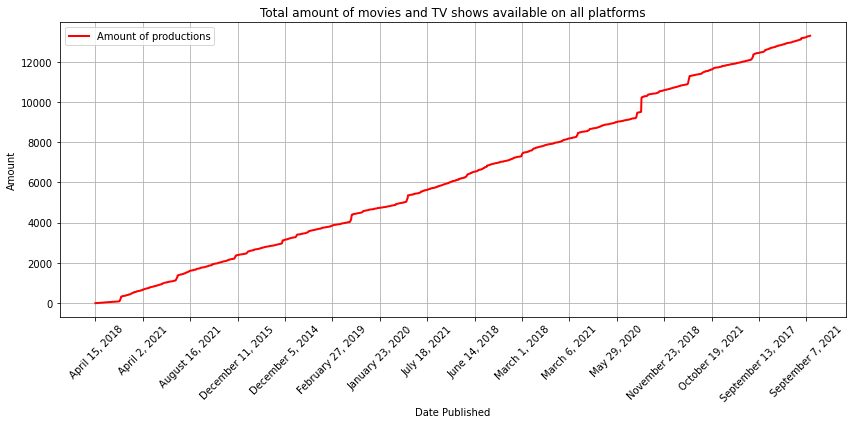

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(date_counts['date_added'], date_counts['cumulative_count'], label='Amount of productions', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date Published')
plt.ylabel('Amount')
plt.title('Total amount of movies and TV shows available on all platforms')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
num_ticks = 15
step = len(date_counts) // num_ticks
plt.xticks(date_counts['date_added'][::step], rotation=45)

plt.tight_layout()
plt.show()

In [57]:
disney_df['date_added'] = pd.to_datetime(disney_df['date_added'].str.strip(), format='%B %d, %Y')
disney_df = disney_df.sort_values(by='date_added')
date_counts_disney = disney_df.groupby('date_added').size().reset_index(name='count')
date_counts_disney['cumulative_count'] = date_counts_disney['count'].cumsum()
date_counts_disney

,date_added,count,cumulative_count
0,2019-10-01,10,10
1,2019-11-12,722,732
2,2019-11-15,1,733
3,2019-11-18,1,734
4,2019-11-20,1,735
...,...,...,...
162,2021-11-17,1,1434
163,2021-11-19,4,1438
164,2021-11-24,4,1442
165,2021-11-25,1,1443


In [58]:
#amazon_df['date_added'] = pd.to_datetime(amazon_df['date_added'].str.strip(), format='%B %d, %Y')
amazon_df = amazon_df.sort_values(by='date_added')
date_counts_amazon = amazon_df.groupby('date_added').size().reset_index(name='count')
date_counts_amazon['cumulative_count'] = date_counts_amazon['count'].cumsum()
date_counts_amazon

,date_added,count,cumulative_count
0,"April 1, 2021",3,3
1,"April 10, 2021",1,4
2,"April 13, 2021",1,5
3,"April 17, 2021",2,7
4,"April 20, 2021",2,9
...,...,...,...
79,"September 26, 2021",4,149
80,"September 29, 2021",2,151
81,"September 30, 2021",1,152
82,"September 4, 2021",1,153


In [59]:
hulu_df['date_added'] = pd.to_datetime(hulu_df['date_added'].str.strip(), format='%B %d, %Y')
hulu_df = hulu_df.sort_values(by='date_added')
date_counts_hulu = hulu_df.groupby('date_added').size().reset_index(name='count')
date_counts_hulu['cumulative_count'] = date_counts_hulu['count'].cumsum()
date_counts_hulu

,date_added,count,cumulative_count
0,2006-07-14,1,1
1,2008-06-01,1,2
2,2008-07-01,1,3
3,2009-02-10,1,4
4,2009-08-14,1,5
...,...,...,...
1092,2021-10-20,2,2975
1093,2021-10-21,2,2977
1094,2021-10-22,3,2980
1095,2021-10-23,2,2982


In [60]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format='%B %d, %Y')
netflix_df = netflix_df.sort_values(by='date_added')
date_counts_netflix = netflix_df.groupby('date_added').size().reset_index(name='count')
date_counts_netflix['cumulative_count'] = date_counts_netflix['count'].cumsum()
date_counts_netflix

,date_added,count,cumulative_count
0,2008-01-01,1,1
1,2008-02-04,1,2
2,2009-05-05,1,3
3,2009-11-18,1,4
4,2010-11-01,1,5
...,...,...,...
1709,2021-09-21,5,8775
1710,2021-09-22,9,8784
1711,2021-09-23,2,8786
1712,2021-09-24,10,8796


##### Available movies and TV shows per platform over time.

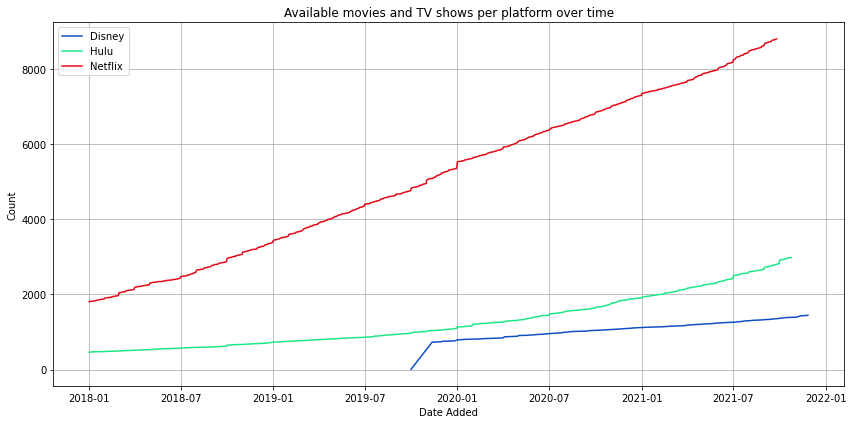

In [61]:
import matplotlib.pyplot as plt

colors = ['#0e4fc3', '#1de783', '#e30917']
dfs = [date_counts_disney, date_counts_hulu, date_counts_netflix]
labels = ['Disney', 'Hulu', 'Netflix']

start_date = '2018-01-01' # filtering out these dfs to focus on latest years and have the scale fitted better
for i, df in enumerate(dfs):
    dfs[i] = df[df['date_added'] >= start_date]

    
plt.figure(figsize=(12, 6))

for i, (df, color) in enumerate(zip(dfs, colors)):
    plt.plot(df['date_added'], df['cumulative_count'], label=labels[i], color=color)

plt.xlabel('Date Added')
plt.ylabel('Count')
plt.title('Available movies and TV shows per platform over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Due to a fact, that for Amazon's df 'date_added' column is not available, this plot is based on 3 other plafrorms.  
Netflix is a clear winner in terms of amount of available movies and tv shows across all the time.  
Hulu follows with about 3 thousand positions available in late 2021.  
Disney+ is last with about 1400 positions available in late 2021.  
Additionally, we can see that there are no productions available on Disney+ before late 2019, which makes sense considering the fact, that Disney+ started it's business in November 2019.

##### The most popular genres.

In [62]:
genre_counts = combined_df['genre'].value_counts()
sorted_genre_counts = genre_counts.sort_values(ascending=False)
top_20_genres = sorted_genre_counts.head(20) #I want to make a limit to list only the popular genres
top_20_genres

genre
Drama                                               1058
Comedy                                               606
Documentaries                                        570
Comedy, Drama                                        418
Drama, Suspense                                      398
Documentary                                          374
Animation, Kids                                      371
Kids                                                 360
Dramas, International Movies                         359
Stand-Up Comedy                                      334
Horror                                               303
Action, Drama                                        302
Documentary, Special Interest                        290
TV Shows                                             279
Comedies, Dramas, International Movies               272
Dramas, Independent Movies, International Movies     248
Action                                               242
Drama, Romance           

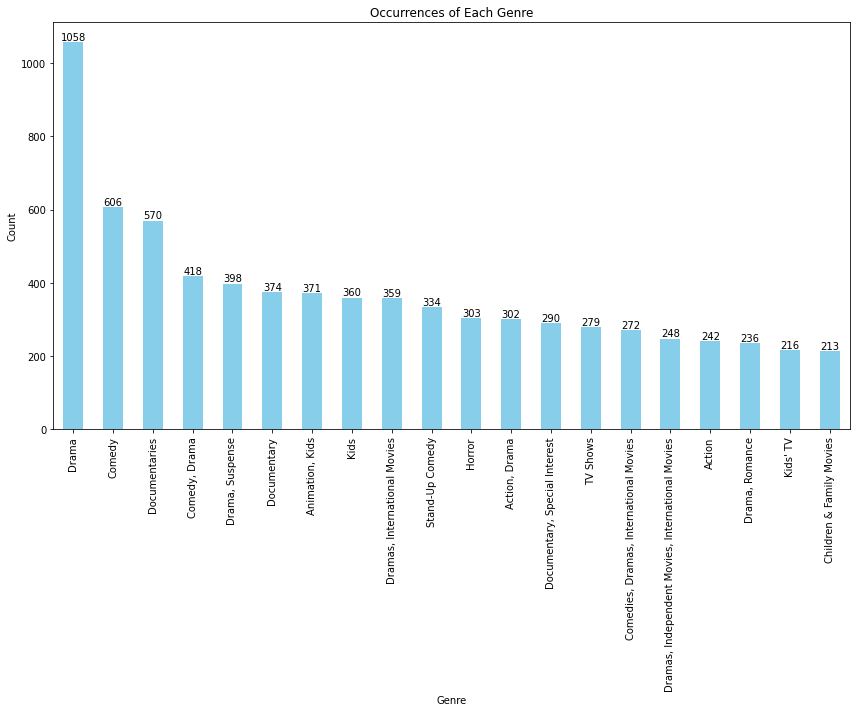

In [63]:
plt.figure(figsize=(12, 10))
top_20_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Occurrences of Each Genre')
plt.xticks(rotation=90)

for x, y in enumerate(top_20_genres):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Drama** is far the most popular genre with 1058 occurences, followed by **Comedy** (606) and **Documentaries** (570). 

Now let's try to investigate the trend of the most popular genres over the years.

In [64]:
combined_year_genre = combined_df.groupby(['release_year', 'genre']).size().reset_index(name='Count')
combined_year_genre

,release_year,genre,Count
0,1920,"Comedy, Drama, Kids",1
1,1920,Drama,2
2,1922,Action,1
3,1922,Suspense,1
4,1923,Drama,2
...,...,...,...
8168,2021,Talk Show,1
8169,2021,Thriller,3
8170,2021,Thrillers,4
8171,2021,Unscripted,5


##### The most popular genre each year.

In [65]:
max_count_indices = combined_year_genre.groupby('release_year')['Count'].idxmax()
filtered_combined_year_genre = combined_year_genre.loc[max_count_indices]

In [66]:
filtered_combined_year_genre.head(20)

,release_year,genre,Count
1,1920,Drama,2
2,1922,Action,1
4,1923,Drama,2
5,1924,Drama,1
6,1925,Action,1
15,1926,Romance,1
17,1927,Comedy,1
18,1928,"Animation, Family, Kids",1
19,1929,"Action, Drama",1
23,1930,"Action, Drama",1


In [67]:
filtered_combined_year_genre.tail(20)

,release_year,genre,Count
2357,2002,"Drama, Suspense",11
2472,2003,Drama,8
2601,2004,Drama,13
2758,2005,Drama,10
2914,2006,Drama,20
3083,2007,Drama,20
3226,2008,Comedy,18
3467,2009,Drama,13
3623,2010,Comedy,19
3957,2011,Music Videos and Concerts,36


Over the years **Drama** seems to be an ongoing favourite, yet the change in populatity is visible.  
80-90 years ago Westerns and Family films were also among the most popular genres.  
Now Drama is even more popular, leaving some space for Comedies and Documentaries.